In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.datasets import load_wine

In [80]:
df=load_wine()
X=df.data
y=df.target
x=pd.DataFrame(X,columns=df.feature_names)
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [82]:
boost_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
boost_model.fit(X_train,y_train)
y_pred=boost_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9444444444444444
Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### SCALING THE DATA BEFORE PCA TRANSFORMATION TO GENERATE UNBIASED PCA COMPONENTS

In [83]:
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [84]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,stratify=y,test_size=0.2,random_state=42)

In [85]:
pd.DataFrame(x_pca).head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


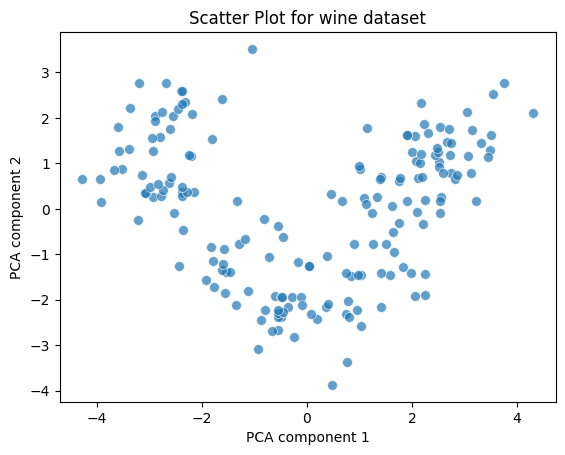

In [97]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],s=50,alpha=0.7)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("Scatter Plot for wine dataset")
plt.show()

#### CHECKING FOR OPTIMAL VALUE OF K

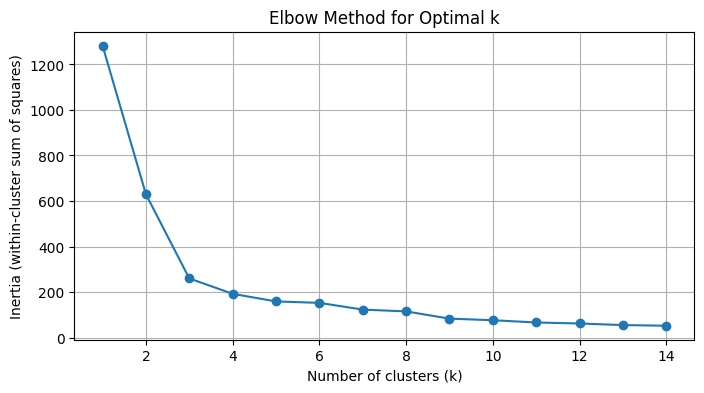

In [87]:
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

##### K=3 IS THE OPTIMAL VALUE

In [88]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_pca)
clusters=kmeans.predict(x_pca)

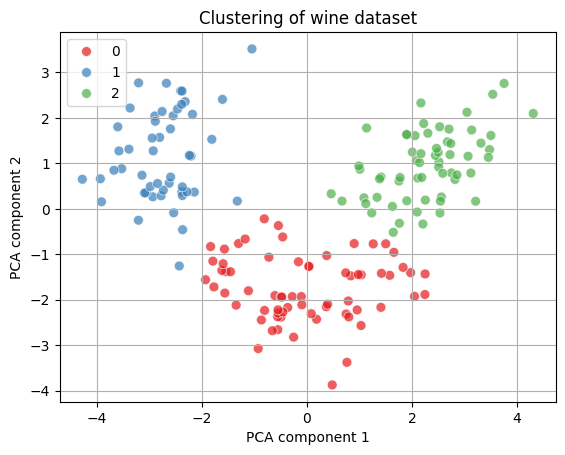

In [95]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],s=50,alpha=0.7,hue=clusters,palette='Set1')
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.grid(True)
plt.title("Clustering of wine dataset")
plt.show()

In [90]:
pd.Series(y).value_counts()

,count
1,71
0,59
2,48


#### ADDING THE CLUSTER COLUMN TO HELP THE MODEL

In [91]:
x=pd.DataFrame(x,columns=df.feature_names)
x['clusters']=pd.Series(clusters)
x['target']=pd.Series(y)
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clusters,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2,0


In [92]:
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [93]:
boost_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
boost_model.fit(X_train,y_train)
y_pred=boost_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9722222222222222
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



#### THUS ADDITION OF CLUSTER COLUMN INCREASED THE ACCURACY OF THE MODEL